# Установка библиотек


In [1]:
import geopandas as gpd
from osgeo import gdal

print("GeoPandas version:", gpd.__version__)
print("GDAL version:", gdal.__version__)


GeoPandas version: 0.14.2
GDAL version: 3.6.2


# Считывание данных

In [2]:
import geopandas as gpd

# Укажите путь к файлу gorizontali.TAB
file_path = 'Kambraka_map/gorizontali.TAB'

# Чтение данных из файла
try:
    data = gpd.read_file(file_path)
    print(data.head())  # Вывод первых строк данных
    print(data.columns)  # Вывод названий столбцов
except Exception as e:
    print(f"Ошибка при открытии файла: {e}")


    FNODE_   TNODE_  LPOLY_  RPOLY_  LENGTH    PHLR_  PHLR_ID  PHLR_CODE  \
0  15154.0  15145.0     0.0     0.0    0.00  10578.0  11534.0   201100.0   
1  15160.0  15156.0     0.0     0.0    0.00  10641.0  11614.0   201200.0   
2  15115.0  15115.0     0.0     0.0    0.01  11062.0  12081.0   201400.0   
3  29739.0  29739.0     0.0     0.0    0.00  19416.0  22291.0   201100.0   
4  29865.0  29865.0     0.0     0.0    0.01  19418.0  22293.0   201100.0   

   PHLR_ABS  CONT                                           geometry  
0     100.0   0.0  LINESTRING (53.67691 55.99756, 53.67867 55.99786)  
1      80.0   0.0  LINESTRING (53.67892 55.99706, 53.67985 55.997...  
2      65.0   0.0  LINESTRING (53.88334 55.99672, 53.88550 55.997...  
3     100.0   0.0  LINESTRING (53.78171 56.53965, 53.78120 56.539...  
4     100.0   0.0  LINESTRING (53.92983 56.46254, 53.93045 56.462...  
Index(['FNODE_', 'TNODE_', 'LPOLY_', 'RPOLY_', 'LENGTH', 'PHLR_', 'PHLR_ID',
       'PHLR_CODE', 'PHLR_ABS', 'CONT', 

In [3]:
# Вывод уникальных значений высоты
unique_heights = data['PHLR_ABS'].unique()
print("Уникальные значения высот:", unique_heights)


Уникальные значения высот: [100.  80.  65. 180. 160. 140. 120.  60. 170.  70. 190. 150.  90. 110.
 200. 220. 210. 130.  75.  85.]


In [5]:
min_height = data['PHLR_ABS'].min()
max_height = data['PHLR_ABS'].max()
mean_height = data['PHLR_ABS'].mean()

print(f"Минимальная высота: {min_height} м")
print(f"Максимальная высота: {max_height} м")
print(f"Средняя высота: {mean_height:.2f} м")


Минимальная высота: 60.0 м
Максимальная высота: 220.0 м
Средняя высота: 127.27 м


# Рисует карту высот

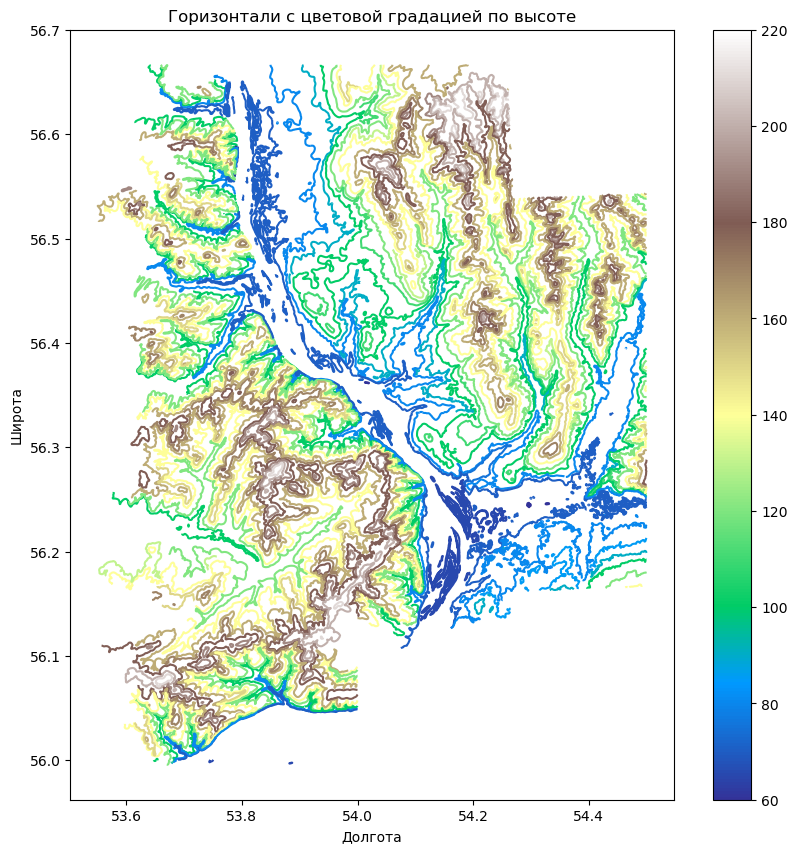

In [4]:
import matplotlib.pyplot as plt

# Настройка фигуры и цветов по высоте
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
data.plot(column='PHLR_ABS', cmap='terrain', legend=True, ax=ax)
plt.title("Горизонтали с цветовой градацией по высоте")
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.show()


# График опредлённых высот

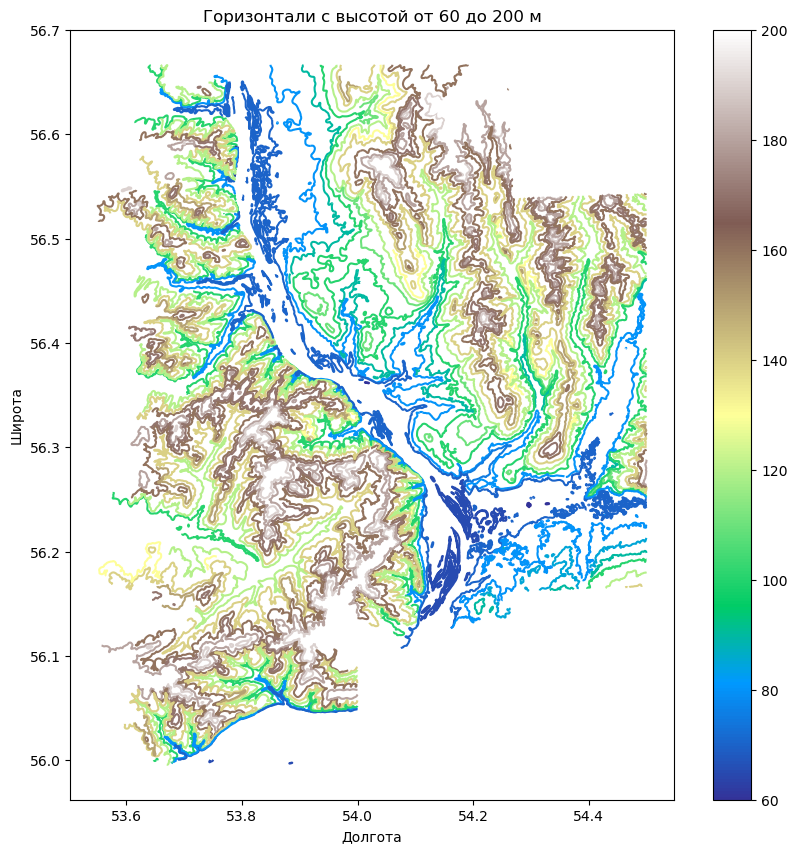

In [21]:
import matplotlib.pyplot as plt

# Укажите желаемый диапазон высот
min_height = 60  # Минимальная высота для отображения
max_height = 200  # Максимальная высота для отображения

# Фильтрация данных по диапазону высот
filtered_data = data[(data['PHLR_ABS'] >= min_height) & (data['PHLR_ABS'] <= max_height)]

# Настройка фигуры и цветов по высоте
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
filtered_data.plot(column='PHLR_ABS', cmap='terrain', legend=True, ax=ax)

# Настройка заголовка и подписей осей
plt.title(f"Горизонтали с высотой от {min_height} до {max_height} м")
plt.xlabel("Долгота")
plt.ylabel("Широта")

# Отображение графика
plt.show()


# График высот для части карты

C:\Users\PC1\AppData\Local\Temp\ipykernel_4672\2915028308.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (data.geometry.centroid.x >= min_longitude) &
C:\Users\PC1\AppData\Local\Temp\ipykernel_4672\2915028308.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (data.geometry.centroid.x <= max_longitude) &
C:\Users\PC1\AppData\Local\Temp\ipykernel_4672\2915028308.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (data.geometry.centroid.y >= min_latitude) &
C:\Users\PC1\AppData\Local\Temp\ipykernel_4672\2915028308.py:20: UserWarning: Geometry is in a geographic C

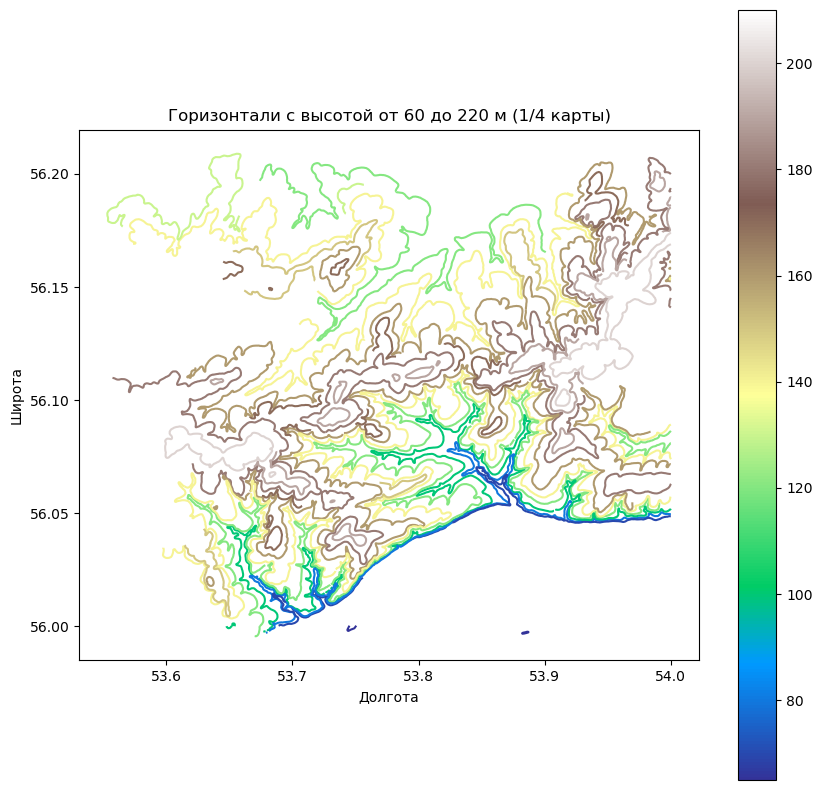

In [22]:
import matplotlib.pyplot as plt

# Укажите желаемый диапазон высот
min_height = 60   # Минимальная высота для отображения
max_height = 220 # Максимальная высота для отображения

# Укажите диапазон координат для отображения 1/4 карты
min_longitude = 53.6  # Минимальная долгота
max_longitude = 54.0  # Максимальная долгота
min_latitude = 55.9   # Минимальная широта
max_latitude = 56.2   # Максимальная широта

# Фильтрация данных по диапазону высот и координат
filtered_data = data[
    (data['PHLR_ABS'] >= min_height) & 
    (data['PHLR_ABS'] <= max_height) &
    (data.geometry.centroid.x >= min_longitude) & 
    (data.geometry.centroid.x <= max_longitude) &
    (data.geometry.centroid.y >= min_latitude) & 
    (data.geometry.centroid.y <= max_latitude)
]

# Настройка фигуры и цветов по высоте
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
filtered_data.plot(column='PHLR_ABS', cmap='terrain', legend=True, ax=ax)

# Настройка заголовка и подписей осей
plt.title(f"Горизонтали с высотой от {min_height} до {max_height} м (1/4 карты)")
plt.xlabel("Долгота")
plt.ylabel("Широта")

# Отображение графика
plt.show()


# Узнаю характерестики переменных


In [15]:
import geopandas as gpd

# Укажите путь к файлу gorizontali.TAB
file_path = 'Kambraka_map/gorizontali.TAB'

# Чтение данных из файла
data = gpd.read_file(file_path)

# Найдем минимальное и максимальное значение по высоте
min_height = data['PHLR_ABS'].min()
max_height = data['PHLR_ABS'].max()

# Найдем минимальные и максимальные координаты (долгота и широта)
min_longitude = data.geometry.bounds.minx.min()
max_longitude = data.geometry.bounds.maxx.max()
min_latitude = data.geometry.bounds.miny.min()
max_latitude = data.geometry.bounds.maxy.max()

# Вывод информации о минимальных и максимальных значениях
print(f"Минимальная высота: {min_height} м")
print(f"Максимальная высота: {max_height} м")
print(f"Минимальная долгота: {min_longitude}")
print(f"Максимальная долгота: {max_longitude}")
print(f"Минимальная широта: {min_latitude}")
print(f"Максимальная широта: {max_latitude}")

# Вывод всех уникальных значений высот
unique_heights = data['PHLR_ABS'].unique()
print("\nУникальные значения высот на карте:")
for height in sorted(unique_heights):
    print(f"{height} м")

# Также можно вывести пример данных с координатами и высотами
print("\nПример данных о координатах и высотах:")
for idx, row in data.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y  # Получаем координаты центра линии
    height = row['PHLR_ABS']
    print(f"Координаты: ({x}, {y}) — Высота: {height} м")


Минимальная высота: 60.0 м
Максимальная высота: 220.0 м
Минимальная долгота: 53.55067
Максимальная долгота: 54.5
Минимальная широта: 55.995576
Максимальная широта: 56.666794

Уникальные значения высот на карте:
60.0 м
65.0 м
70.0 м
75.0 м
80.0 м
85.0 м
90.0 м
100.0 м
110.0 м
120.0 м
130.0 м
140.0 м
150.0 м
160.0 м
170.0 м
180.0 м
190.0 м
200.0 м
210.0 м
220.0 м

Пример данных о координатах и высотах:
Координаты: (53.6777905, 55.997708) — Высота: 100.0 м
Координаты: (53.6795430695998, 55.99720165583146) — Высота: 80.0 м
Координаты: (53.88460302108486, 55.99712854351982) — Высота: 65.0 м
Координаты: (53.78141129086498, 56.5400610100657) — Высота: 100.0 м
Координаты: (53.92946675428715, 56.46183926610071) — Высота: 100.0 м
Координаты: (53.78807182734549, 56.578845460426635) — Высота: 100.0 м
Координаты: (53.76935589297601, 56.524133470269454) — Высота: 100.0 м
Координаты: (53.786022739531695, 56.561710999428406) — Высота: 100.0 м
Координаты: (53.79182853186202, 56.53032077124328) — Высота

# Подобный код но я сам ограничиваю координаты

In [ ]:
import geopandas as gpd

# Укажите путь к файлу gorizontali.TAB
file_path = 'Kambraka_map/gorizontali.TAB'

# Чтение данных из файла
data = gpd.read_file(file_path)

# Задание границ (в 1/10 карты от минимальных и максимальных значений)
min_longitude = 53.6  # Минимальная долгота
max_longitude = 54.0  # Максимальная долгота
min_latitude = 55.9   # Минимальная широта
max_latitude = 56.2   # Максимальная широта

# Фильтрация данных по выбранным координатам
filtered_data = data[
    (data.geometry.centroid.x >= min_longitude) & 
    (data.geometry.centroid.x <= max_longitude) & 
    (data.geometry.centroid.y >= min_latitude) & 
    (data.geometry.centroid.y <= max_latitude)
]

# Проверим, есть ли данные в выбранном диапазоне
if not filtered_data.empty:
    # Найдем уникальные значения высот в выбранной области
    unique_heights = filtered_data['PHLR_ABS'].unique()
    
    # Вывод информации о высотах
    print("\nУникальные значения высот в выбранной области:")
    for height in sorted(unique_heights):
        print(f"{height} м")

    # Дополнительно: Выводим минимальные и максимальные высоты в выбранной области
    min_height_in_area = filtered_data['PHLR_ABS'].min()
    max_height_in_area = filtered_data['PHLR_ABS'].max()
    print(f"\nМинимальная высота в выбранной области: {min_height_in_area} м")
    print(f"Максимальная высота в выбранной области: {max_height_in_area} м")

    # Выводим пример данных о координатах и высотах
    print("\nПример данных о координатах и высотах:")
    for idx, row in filtered_data.iterrows():
        x, y = row.geometry.centroid.x, row.geometry.centroid.y  # Получаем координаты центра линии
        height = row['PHLR_ABS']
        print(f"Координаты: ({x}, {y}) — Высота: {height} м")
else:
    print("Нет данных в выбранном диапазоне координат.")



Уникальные значения высот в выбранной области:
65.0 м
70.0 м
80.0 м
100.0 м
120.0 м
130.0 м
140.0 м
150.0 м
160.0 м
170.0 м
180.0 м
190.0 м
200.0 м
210.0 м

Минимальная высота в выбранной области: 65.0 м
Максимальная высота в выбранной области: 210.0 м

Пример данных о координатах и высотах:
Координаты: (53.6777905, 55.997708) — Высота: 100.0 м
Координаты: (53.6795430695998, 55.99720165583146) — Высота: 80.0 м
Координаты: (53.88460302108486, 55.99712854351982) — Высота: 65.0 м
Координаты: (53.91450160252623, 56.10059122103597) — Высота: 200.0 м
Координаты: (53.6839861163799, 56.067207583826914) — Высота: 200.0 м
Координаты: (53.640330716677, 56.07837831410225) — Высота: 200.0 м
Координаты: (53.83928781097434, 56.07965157442321) — Высота: 100.0 м
Координаты: (53.878007676490945, 56.07162989436234) — Высота: 100.0 м
Координаты: (53.730917239957975, 56.01685206361719) — Высота: 100.0 м
Координаты: (53.727926862937785, 56.015411808718724) — Высота: 100.0 м
Координаты: (53.7984814935086, 5

C:\Users\PC1\AppData\Local\Temp\ipykernel_4672\927413903.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (data.geometry.centroid.x >= min_longitude) &
C:\Users\PC1\AppData\Local\Temp\ipykernel_4672\927413903.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (data.geometry.centroid.x <= max_longitude) &
C:\Users\PC1\AppData\Local\Temp\ipykernel_4672\927413903.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (data.geometry.centroid.y >= min_latitude) &
C:\Users\PC1\AppData\Local\Temp\ipykernel_4672\927413903.py:21: UserWarning: Geometry is in a geographic CRS. 

# Попробую взять область 100 на 100 метров из цетра

C:\Users\PC1\AppData\Local\Temp\ipykernel_4672\806838594.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (data.geometry.centroid.x >= min_longitude) &
C:\Users\PC1\AppData\Local\Temp\ipykernel_4672\806838594.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (data.geometry.centroid.x <= max_longitude) &
C:\Users\PC1\AppData\Local\Temp\ipykernel_4672\806838594.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (data.geometry.centroid.y >= min_latitude) &
C:\Users\PC1\AppData\Local\Temp\ipykernel_4672\806838594.py:21: UserWarning: Geometry is in a geographic CRS. 


Уникальные значения высот в выбранном диапазоне:
80.0 м
100.0 м
120.0 м
140.0 м
160.0 м
170.0 м

Данные по каждой точке:
Широта: 56.02682306354532, Долгота: 53.66597129034409, Высота: 100.0 м
Широта: 56.038717422046695, Долгота: 53.65351169854129, Высота: 120.0 м
Широта: 56.04320167989388, Долгота: 53.67274230792505, Высота: 120.0 м
Широта: 56.04898350345751, Долгота: 53.69590219788818, Высота: 160.0 м
Широта: 56.03188361973978, Долгота: 53.66872898469667, Высота: 120.0 м
Широта: 56.040961240205334, Долгота: 53.690321532714805, Высота: 140.0 м
Широта: 56.04627842633747, Долгота: 53.682003603528095, Высота: 170.0 м
Широта: 56.0384961595923, Долгота: 53.68532826734842, Высота: 170.0 м
Широта: 56.01219908789344, Долгота: 53.685062127608525, Высота: 80.0 м

Пример данных в формате [уровень высоты, долгота, широта]:
[100.0, 53.66597129034409, 56.02682306354532]
[120.0, 53.65351169854129, 56.038717422046695]
[120.0, 53.67274230792505, 56.04320167989388]
[160.0, 53.69590219788818, 56.0489835

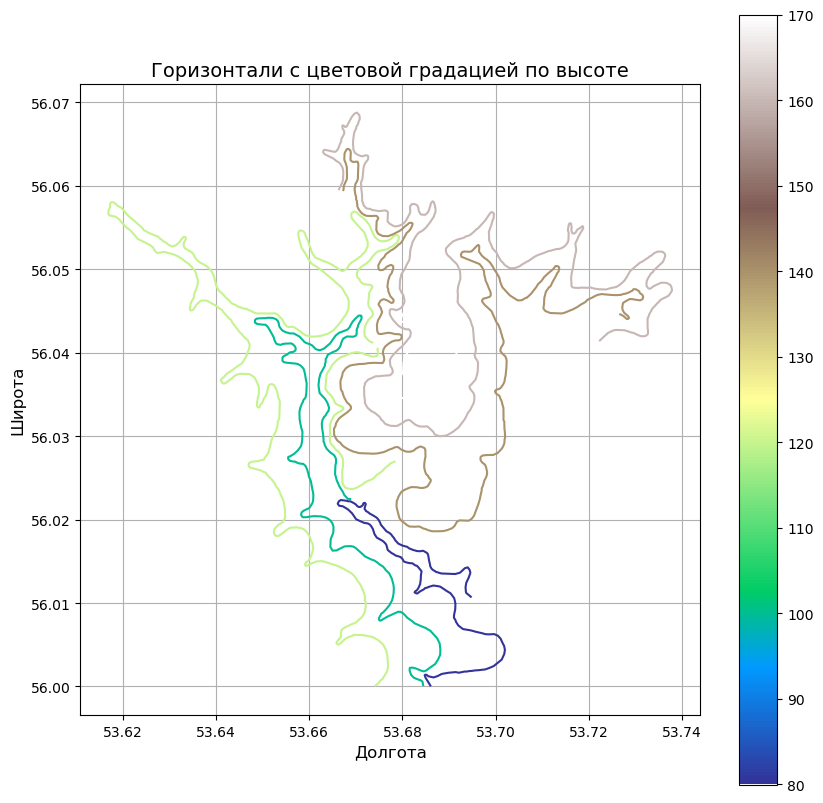

In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Укажите путь к файлу gorizontali.TAB
file_path = 'Kambraka_map/gorizontali.TAB'

# Чтение данных из файла
data = gpd.read_file(file_path)

# Задание границ для верхней левой четверти карты
min_longitude = 53.65  # Минимальная долгота
max_longitude = 53.70  # Максимальная долгота (в пределах первой четверти)
min_latitude = 56.01   # Минимальная широта
max_latitude = 56.05   # Максимальная широта (в пределах первой четверти)

# Фильтрация данных по выбранным координатам
filtered_data = data[
    (data.geometry.centroid.x >= min_longitude) & 
    (data.geometry.centroid.x <= max_longitude) & 
    (data.geometry.centroid.y >= min_latitude) & 
    (data.geometry.centroid.y <= max_latitude)
]

# Проверим, есть ли данные в выбранном диапазоне
if not filtered_data.empty:
    # Вывод уникальных значений высот в выбранном диапазоне
    unique_heights = filtered_data['PHLR_ABS'].unique()
    print("\nУникальные значения высот в выбранном диапазоне:")
    for height in sorted(unique_heights):
        print(f"{height} м")

    # Создание массива координат [уровень высоты, долгота, широта] для всех точек в диапазоне
    coordinates = []
    print("\nДанные по каждой точке:")
    for idx, row in filtered_data.iterrows():
        height = row['PHLR_ABS']  # Уровень высоты
        x, y = row.geometry.centroid.x, row.geometry.centroid.y  # Координаты долготы и широты
        coordinates.append([height, x, y])
        
        # Выводим значения широты, долготы и высоты для каждой точки
        print(f"Широта: {y}, Долгота: {x}, Высота: {height} м")

    # Выводим первые несколько значений из массива координат
    print("\nПример данных в формате [уровень высоты, долгота, широта]:")
    for coord in coordinates[:5]:  # Покажем только первые 5 элементов
        print(coord)

    # Построение графика с цветовой градацией по высоте
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # Визуализируем данные с цветовой градацией по высоте (PHLR_ABS)
    filtered_data.plot(column='PHLR_ABS', cmap='terrain', legend=True, ax=ax)

    # Настройка графика
    plt.title("Горизонтали с цветовой градацией по высоте", fontsize=14)
    plt.xlabel("Долгота", fontsize=12)
    plt.ylabel("Широта", fontsize=12)
    plt.grid(True)

    # Показать график
    plt.show()

else:
    print("Нет данных в выбранном диапазоне координат.")


# Ограничение всех данных размером квадрата

In [49]:

filtered_data = data[
    (data.geometry.centroid.x >= min_longitude) & 
    (data.geometry.centroid.x <= max_longitude) & 
    (data.geometry.centroid.y >= min_latitude) & 
    (data.geometry.centroid.y <= max_latitude)
]
print(filtered_data)

      FNODE_   TNODE_  LPOLY_  RPOLY_  LENGTH    PHLR_  PHLR_ID  PHLR_CODE  \
280  31719.0  31684.0     0.0     0.0    0.16  20463.0  23531.0   201100.0   
329  31721.0  31641.0     0.0     0.0    0.27  20524.0  23620.0   201200.0   
330  31641.0  31649.0     0.0     0.0    0.01  20525.0  23621.0   201200.0   
346  31611.0  31646.0     0.0     0.0    0.24  20547.0  23652.0   201200.0   
352  31651.0  31677.0     0.0     0.0    0.04  20558.0  23663.0   201200.0   
353  31612.0  31640.0     0.0     0.0    0.25  20559.0  23664.0   201200.0   
429  31637.0  31637.0     0.0     0.0    0.02  20673.0  23793.0   201300.0   
474  31652.0  31652.0     0.0     0.0    0.04  20741.0  23869.0   201300.0   
514  31720.0  33124.0     0.0     0.0    0.10  22485.0  23763.0   201200.0   

     PHLR_ABS  CONT                                           geometry  
280     100.0   0.0  LINESTRING (53.68447 56.00005, 53.68431 56.000...  
329     120.0   0.0  LINESTRING (53.67409 56.00004, 53.67493 56.000...  


C:\Users\PC1\AppData\Local\Temp\ipykernel_4672\4291054811.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (data.geometry.centroid.x >= min_longitude) &
C:\Users\PC1\AppData\Local\Temp\ipykernel_4672\4291054811.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (data.geometry.centroid.x <= max_longitude) &
C:\Users\PC1\AppData\Local\Temp\ipykernel_4672\4291054811.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (data.geometry.centroid.y >= min_latitude) &
C:\Users\PC1\AppData\Local\Temp\ipykernel_4672\4291054811.py:5: UserWarning: Geometry is in a geographic CRS. 

### Тут все данные хранятся по формату высота и линия со всеми её координатами

# Считывание всех точек из линий

In [82]:
import geopandas as gpd
import pandas as pd

# Пример функции для извлечения координат из LINESTRING
def extract_coordinates(line_string, height):
    # Составляем список координат (x, y) для каждой строки
    coordinates = [(x, y) for x, y in line_string.coords]
    return coordinates

# Применяем эту функцию ко всем строкам данных
def process_data(data):
    results = []
    for _, row in data.iterrows():
        # Извлекаем LINESTRING и PHLR_ABS (высота)
        line_string = row['geometry']
        phlr_abs = row['PHLR_ABS']
        
        # Извлекаем координаты
        coordinates = extract_coordinates(line_string, phlr_abs)
        
        # Добавляем данные с привязкой к высоте
        for coord in coordinates:
            results.append({
                'PHLR_ABS': phlr_abs,
                'Coordinates': coord
            })
    
    return results

# Применяем к данным
processed_data = process_data(filtered_data)

# Преобразуем результат в DataFrame для удобства вывода
processed_df = pd.DataFrame(processed_data)

# Выводим обработанные данные
print(processed_df)


      PHLR_ABS             Coordinates
0        100.0  (53.684474, 56.000047)
1        100.0  (53.684306, 56.000563)
2        100.0  (53.683911, 56.000742)
3        100.0  (53.683508, 56.000809)
4        100.0  (53.682907, 56.000935)
...        ...                     ...
2171      80.0  (53.693543, 56.011889)
2172      80.0  (53.693609, 56.011371)
2173      80.0  (53.693698, 56.011198)
2174      80.0  (53.694489, 56.010839)
2175      80.0   (53.694836, 56.01067)

[2176 rows x 2 columns]


# Построение 3д графика высот

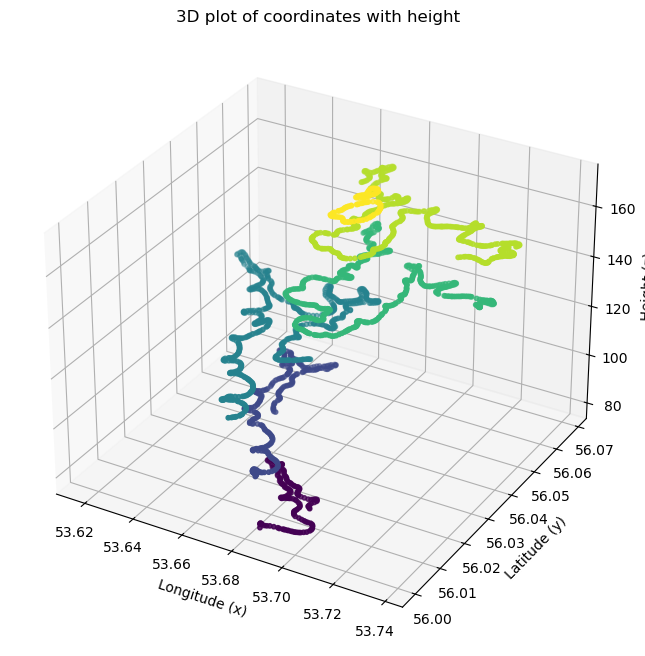

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Извлекаем данные для осей
x = processed_df['Coordinates'].apply(lambda coord: coord[0]).values  # Долгота
y = processed_df['Coordinates'].apply(lambda coord: coord[1]).values  # Широта
z = processed_df['PHLR_ABS'].values  # Высота

# Создаем 3D график
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Строим 3D scatter plot
ax.scatter(x, y, z, c=z, cmap='viridis', s=10)

# Подписываем оси
ax.set_xlabel('Longitude (x)')
ax.set_ylabel('Latitude (y)')
ax.set_zlabel('Height (z)')

# Заголовок
ax.set_title('3D plot of coordinates with height')

# Показываем график
plt.show()


# Открывает 3д график в браузере

In [138]:
import plotly.graph_objects as go
import plotly.io as pio

# Устанавливаем рендеринг в браузер
pio.renderers.default = 'browser'  # Это заставит график открыться в браузере

# Извлекаем данные для осей
x = processed_df['Coordinates'].apply(lambda coord: coord[0]).values  # Долгота
y = processed_df['Coordinates'].apply(lambda coord: coord[1]).values  # Широта
z = processed_df['PHLR_ABS'].values  # Высота

# Создаем 3D график с использованием plotly
fig = go.Figure(data=[go.Scatter3d(
    x=x, 
    y=y, 
    z=z, 
    mode='markers',
    marker=dict(
        size=5,
        color=z,               # Цвет точек зависит от высоты
        colorscale='Viridis',   # Цветовая палитра
        colorbar=dict(title='Height (z)')  # Добавление шкалы цвета
    )
)])

# Подписываем оси
fig.update_layout(
    scene=dict(
        xaxis_title='Longitude (x)',
        yaxis_title='Latitude (y)',
        zaxis_title='Height (z)'
    ),
    title='Interactive 3D Plot of Coordinates with Height'
)

# Показываем график в браузере
fig.show()


# Пробую апроксимировать

In [87]:
print(processed_df)
print(type(processed_df))


      PHLR_ABS             Coordinates
0        100.0  (53.684474, 56.000047)
1        100.0  (53.684306, 56.000563)
2        100.0  (53.683911, 56.000742)
3        100.0  (53.683508, 56.000809)
4        100.0  (53.682907, 56.000935)
...        ...                     ...
2171      80.0  (53.693543, 56.011889)
2172      80.0  (53.693609, 56.011371)
2173      80.0  (53.693698, 56.011198)
2174      80.0  (53.694489, 56.010839)
2175      80.0   (53.694836, 56.01067)

[2176 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


## Берёт максимальную высоту и берёт там две ближайших точки и находит для них точку на высоте ниже

In [133]:
import pandas as pd
import math

# Функция для расчета расстояния между двумя точками на сфере (по формуле Haversine)
def haversine(lat1, lon1, lat2, lon2):
    # Радиус Земли в километрах
    R = 6371.0
    
    # Преобразуем градусы в радианы
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Разница между широтами и долготами
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Формула Haversine
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Расстояние в километрах
    distance = R * c
    return distance * 1000  # Переводим в метры

# Функция для нахождения ближайшей точки
def find_nearest_point(point, df):
    min_distance = float('inf')
    nearest_point = None
    lat1, lon1 = point
    for _, row in df.iterrows():
        lat2, lon2 = row['Coordinates']
        distance = haversine(lat1, lon1, lat2, lon2)
        if distance < min_distance:
            min_distance = distance
            nearest_point = row['Coordinates']
    return nearest_point

# Загружаем данные (предполагаем, что они уже в processed_df)
max_height = processed_df['PHLR_ABS'].max()  # Находим максимальную высоту
max_height_points = processed_df[processed_df['PHLR_ABS'] == max_height]  # Точки с максимальной высотой

# Массив для хранения тройок
triplets = []

# Перебираем все точки на максимальной высоте
for i, row1 in max_height_points.iterrows():
    point1 = row1['Coordinates']
    
    # Исключаем точку row1 из рассмотрения для следующих итераций
    max_height_points_remaining = max_height_points[max_height_points.index != i]
    
    # Для текущей точки на максимальной высоте находим ближайшую точку на той же высоте
    nearest_point1 = find_nearest_point(point1, max_height_points_remaining)
    
    # Находим ближайшую точку на высоте, меньшей, чем максимальная (например, 160)
    lower_height_points = processed_df[processed_df['PHLR_ABS'] < max_height]
    nearest_point2 = find_nearest_point(nearest_point1, lower_height_points)
    
    # Добавляем тройку в список
    triplets.append([point1, nearest_point1, nearest_point2])

# Преобразуем в DataFrame для удобства
triplets_df = pd.DataFrame(triplets, columns=['Point1', 'Point2', 'NearestPoint'])

# Выводим результат
print(triplets_df)


                     Point1                  Point2            NearestPoint
0    (53.683933, 56.046672)  (53.683933, 56.046672)  (53.681805, 56.042442)
1    (53.684156, 56.046955)  (53.684281, 56.047294)  (53.681489, 56.051119)
2    (53.684281, 56.047294)  (53.684156, 56.046955)  (53.681805, 56.042442)
3    (53.684317, 56.047805)  (53.684243, 56.048206)  (53.681489, 56.051119)
4    (53.684243, 56.048206)  (53.684317, 56.047805)  (53.681489, 56.051119)
..                      ...                     ...                     ...
103  (53.683511, 56.042063)   (53.68373, 56.042283)  (53.681805, 56.042442)
104  (53.682967, 56.041558)  (53.682747, 56.041334)  (53.681667, 56.041928)
105  (53.682747, 56.041334)  (53.682532, 56.041168)  (53.681667, 56.041928)
106  (53.682532, 56.041168)  (53.682747, 56.041334)  (53.681667, 56.041928)
107  (53.681349, 56.040282)  (53.681349, 56.040282)  (53.681026, 56.041488)

[108 rows x 3 columns]


In [139]:
import plotly.graph_objects as go
import plotly.io as pio

# Установка рендерера для отображения графика в браузере
pio.renderers.default = 'browser'

# Создание графика
fig = go.Figure()

# Добавление линий для каждой строки DataFrame
for index, row in triplets_df.iterrows():
    point1 = row["Point1"]
    point2 = row["Point2"]
    nearest_point = row["NearestPoint"]

    # Линия между Point1 и Point2
    fig.add_trace(go.Scatter3d(
        x=[point1[0], point2[0]], 
        y=[point1[1], point2[1]], 
        z=[170, 170], 
        mode='lines+markers',
        line=dict(color='blue', width=2),
        marker=dict(size=5, color='blue')
    ))

    # Линия между Point1 и NearestPoint
    fig.add_trace(go.Scatter3d(
        x=[point1[0], nearest_point[0]], 
        y=[point1[1], nearest_point[1]], 
        z=[170, 160], 
        mode='lines+markers',
        line=dict(color='red', width=2),
        marker=dict(size=5, color='red')
    ))

    # Линия между Point2 и NearestPoint
    fig.add_trace(go.Scatter3d(
        x=[point2[0], nearest_point[0]], 
        y=[point2[1], nearest_point[1]], 
        z=[170, 160], 
        mode='lines+markers',
        line=dict(color='green', width=2),
        marker=dict(size=5, color='green')
    ))

# Настройка графика
fig.update_layout(
    scene=dict(
        xaxis_title='Longitude',
        yaxis_title='Latitude',
        zaxis_title='Height',
    ),
    title="3D plot of Points and Lines",
    showlegend=False
)

# Отображение графика в браузере
fig.show()
